In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
y_train = pd.read_csv('data/AMF_train_Y.csv')

In [3]:
from helper import read_x_train, fill_nan
x_train = read_x_train('data/AMF_train_X.csv', includeShare=True, includeDay=True)

In [4]:
y_train.groupby('type').count()

,Trader
type,
HFT,15
MIX,24
NON HFT,47


In [5]:
name2type = dict(zip(y_train.Trader, y_train.type))

In [6]:
n_rows, n_cols = x_train.shape

In [7]:
x_train

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,8,24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,87,29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,87,23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,12,11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,87,9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,84,27,Trader_60,1.150000,23.000000,NaN,0.0,736.500080,0.000000,0.000188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
105778,102,18,Trader_60,1.352941,23.000000,NaN,0.0,63.672695,0.000000,0.000963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
105779,12,13,Trader_60,1.146667,86.000000,NaN,0.0,708.440816,0.000000,0.000578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
105780,27,30,Trader_60,1.179191,204.000000,NaN,0.0,384.893976,0.000000,0.000536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35


In [27]:
trader_day_share_count = x_train.groupby(['Trader','Day']).Share.agg('count').to_frame('everyday_sharecount').reset_index()

In [29]:
x_train = x_train.join(trader_day_share_count.set_index(['Trader','Day']), on=['Trader','Day'])

In [30]:
trader_day_share_count = x_train.groupby(['Trader','Share']).Share.agg('count').to_frame('everyshare_daycount').reset_index()

In [31]:
x_train = x_train.join(trader_day_share_count.set_index(['Trader','Share']), on=['Trader','Share'])

In [38]:
share_x_train = x_train['Share'].unique()

In [35]:
x_test = read_x_train('data/AMF_test_X.csv', includeShare=True, includeDay=True)

In [39]:
share_x_test = x_test['Share'].unique()

In [40]:
len(share_x_test)

118

In [41]:
len(share_x_train)

119

In [42]:
set(share_x_test).difference(set(share_x_train))

{40, 82, 98}

In [43]:
set(share_x_train).difference(set(share_x_test))

{39, 79, 96, 123}

In [81]:
from collections import Counter
trader_train = y_train['type']
c = Counter(y_train['type'])
default_ratio = [e[1] for e in sorted([(i, c[i] / len(trader_train)) for i in c], key=lambda elem: elem[0])]

In [82]:
default_ratio

[0.1744186046511628, 0.27906976744186046, 0.5465116279069767]

In [53]:
def get_share_trader_distribution(x_train):
    d = {}
    from collections import Counter
    for share in share_x_train:
        type_list = [name2type[trader] for trader in x_train[x_train['Share']==share]['Trader'].unique()]
        c = Counter(type_list)
        d[share] = [e[1] for e in sorted([(i, c[i] / len(type_list)) for i in c], key=lambda elem: elem[0])]
    return d


In [60]:
import seaborn as sns
hft_list = [v[0] for v in get_share_trader_distribution(x_train).values()]
hft_list.sort()


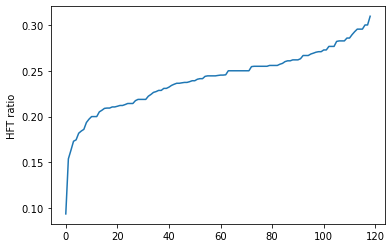

In [61]:
import matplotlib.pyplot as plt
plt.plot(hft_list)
plt.ylabel('HFT ratio')
plt.show()

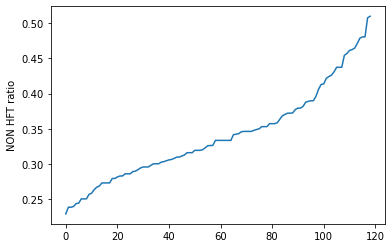

In [62]:
non_hft_list = [v[2] for v in get_share_trader_distribution(x_train).values()]
non_hft_list.sort()
plt.plot(non_hft_list)
plt.ylabel('NON HFT ratio')
plt.show()

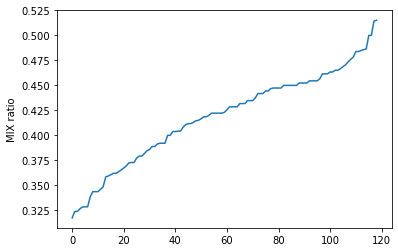

In [63]:
mix_list = [v[1] for v in get_share_trader_distribution(x_train).values()]
mix_list.sort()
plt.plot(mix_list)
plt.ylabel('MIX ratio')
plt.show()

In [68]:
x_train

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,everyday_sharecount,everyshare_daycount
0,8,24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,14
1,87,29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,22
2,87,23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,4,22
3,12,11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,15
4,87,9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,84,27,Trader_60,1.150000,23.000000,NaN,0.0,736.500080,0.000000,0.000188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2
105778,102,18,Trader_60,1.352941,23.000000,NaN,0.0,63.672695,0.000000,0.000963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2,2
105779,12,13,Trader_60,1.146667,86.000000,NaN,0.0,708.440816,0.000000,0.000578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,1,1
105780,27,30,Trader_60,1.179191,204.000000,NaN,0.0,384.893976,0.000000,0.000536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,1,6


In [73]:
share_info = pd.DataFrame.from_dict(get_share_trader_distribution(x_train), orient='index', columns=['share_hft_ratio', 'share_mix_ratio', 'share_non_hft_ratio'])
share_info['Share'] = share_info.index
share_info

,share_hft_ratio,share_mix_ratio,share_non_hft_ratio,Share
8,0.236364,0.381818,0.381818,8
87,0.218750,0.343750,0.437500,87
12,0.200000,0.338462,0.461538,12
27,0.214286,0.328571,0.457143,27
117,0.174603,0.317460,0.507937,117
...,...,...,...,...
56,0.289474,0.447368,0.263158,56
65,0.295455,0.431818,0.272727,65
107,0.276596,0.404255,0.319149,107
93,0.295455,0.431818,0.272727,93


In [75]:
x_test.join(share_info.set_index(['Share']), on=['Share'])

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,share_hft_ratio,share_mix_ratio,share_non_hft_ratio
0,106,12,Adelaide,1.114754,68.000000,NaN,0.000012,22.905096,0.000061,0.003870,...,NaN,NaN,NaN,NaN,NaN,NaN,16,0.244444,0.422222,0.333333
1,94,2,Adelaide,1.666667,5.000000,NaN,0.001970,67.630572,0.001970,0.005786,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0.260870,0.456522,0.282609
2,106,13,Adelaide,1.088235,37.000000,NaN,0.000000,39.506490,0.000000,0.000485,...,NaN,NaN,NaN,NaN,NaN,NaN,6,0.244444,0.422222,0.333333
3,106,7,Adelaide,2.250000,4.500000,NaN,0.000000,103.378733,0.000000,0.004708,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0.244444,0.422222,0.333333
4,106,20,Adelaide,1.266667,19.000000,NaN,0.000026,49.417177,0.000063,0.000152,...,NaN,NaN,NaN,NaN,NaN,NaN,5,0.244444,0.422222,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85299,63,22,The Magic Mirror,2.871595,5.857143,123.000000,0.000000,883.517330,0.000007,17.002092,...,0.001,167.194486,59.901,0.001,141.082862,59.901,219,0.193548,0.483871,0.322581
85300,64,17,The Magic Mirror,5.212121,3.071429,NaN,0.000000,172.979466,0.000005,68.548670,...,0.001,248.172895,78.285,0.054,170.699750,78.285,48,0.282609,0.434783,0.282609
85301,68,2,The Magic Mirror,4.455210,3.856013,16.355705,0.000000,89.774309,0.000083,1.865339,...,0.001,40.202416,15.388,0.001,41.509048,16.328,671,0.285714,0.408163,0.306122
85302,70,5,The Magic Mirror,6.447761,2.989619,432.000000,0.000000,160.000783,0.000000,31.689264,...,0.001,199.806264,109.091,0.001,181.848526,88.792,165,0.241379,0.379310,0.379310


In [ ]:
scale_list = ['OTR', 'OCR', 'OMR', 'mean_time_two_events', 'med_time_two_events']

In [14]:
x_train['10_p_time_two_events'] = preprocessing.scale(x_train['10_p_time_two_events'])

In [15]:
x_train

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,8,24,Trader_10,-0.234316,-0.127020,-0.163583,-0.056435,5117.830300,-0.063888,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,87,29,Trader_10,-0.238513,0.107288,-0.153818,-0.056435,1846.968401,-0.063888,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,87,23,Trader_10,-0.240071,0.415368,-0.049751,-0.056435,686.300630,-0.063888,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,12,11,Trader_10,-0.238446,-0.041184,-0.145822,-0.056435,2174.335265,-0.063888,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,87,9,Trader_10,-0.239816,0.129327,NaN,-0.056435,944.008551,-0.063888,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,84,27,Trader_60,-0.242495,0.077130,NaN,-0.056435,736.500080,-0.063888,0.000188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
105778,102,18,Trader_60,-0.241017,0.077130,NaN,-0.056435,63.672695,-0.063888,0.000963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
105779,12,13,Trader_60,-0.242520,0.954043,NaN,-0.056435,708.440816,-0.063888,0.000578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
105780,27,30,Trader_60,-0.242283,2.596516,NaN,-0.056435,384.893976,-0.063888,0.000536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35


In [18]:
x_train[x_train.apply(lambda x: name2type[x['Trader']] == 'HFT', axis=1)].groupby('Trader')['Day'].count().describe()

count      15.000000
mean     2130.000000
std      2089.542602
min         8.000000
25%       643.000000
50%      1709.000000
75%      2500.500000
max      7587.000000
Name: Day, dtype: float64

In [19]:
x_train[x_train.apply(lambda x: name2type[x['Trader']] == 'MIX', axis=1)].groupby('Trader')['Day'].count().describe()

count       24.00000
mean      2145.12500
std       2097.22598
min          9.00000
25%        670.50000
50%       2329.50000
75%       2547.50000
max      10208.00000
Name: Day, dtype: float64

In [20]:
x_train[x_train.apply(lambda x: name2type[x['Trader']] == 'NON HFT', axis=1)].groupby('Trader')['Day'].count().describe()

count      47.000000
mean      475.510638
std       787.638625
min         1.000000
25%        26.000000
50%        95.000000
75%       306.000000
max      2393.000000
Name: Day, dtype: float64

In [23]:
trader_list = x_train['Trader'].unique()
trader_list.sort()

In [47]:
trader_list

array(['Trader_10', 'Trader_105', 'Trader_107', 'Trader_110',
       'Trader_114', 'Trader_120', 'Trader_127', 'Trader_128',
       'Trader_132', 'Trader_136', 'Trader_140', 'Trader_149',
       'Trader_150', 'Trader_155', 'Trader_158', 'Trader_16',
       'Trader_161', 'Trader_164', 'Trader_169', 'Trader_172',
       'Trader_177', 'Trader_178', 'Trader_179', 'Trader_184',
       'Trader_191', 'Trader_195', 'Trader_205', 'Trader_208',
       'Trader_209', 'Trader_221', 'Trader_222', 'Trader_226',
       'Trader_233', 'Trader_237', 'Trader_241', 'Trader_244',
       'Trader_245', 'Trader_255', 'Trader_256', 'Trader_257',
       'Trader_26', 'Trader_264', 'Trader_275', 'Trader_278',
       'Trader_279', 'Trader_280', 'Trader_285', 'Trader_288',
       'Trader_293', 'Trader_310', 'Trader_312', 'Trader_328',
       'Trader_329', 'Trader_330', 'Trader_338', 'Trader_340',
       'Trader_341', 'Trader_35', 'Trader_358', 'Trader_375', 'Trader_38',
       'Trader_380', 'Trader_385', 'Trader_386

In [92]:
a =[np.array(x_train[x_train['Trader'] == trader].sort_values(
        by=['Day']).drop(['Trader'], axis=1).values.tolist()).reshape(-1,37).flatten().reshape(1,-1) for trader in trader_list]

In [98]:
a[2].shape

(1, 67932)

In [42]:
for data in trader_data:
    print(data.shape)

(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)
(77, 37)


In [52]:
list(y_train.sort_values(by=['Trader'])['type'].apply(lambda x: [1, 0, 0] if x=='HFT' else ([0, 1, 0] if x=='MIX' else [0, 0, 1])))

[[0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0,

In [95]:
a = np.vstack(x_train.groupby(['Trader', 'Day']).apply(np.array))

In [100]:
a[0]

array([8, 2, 'Trader_10', 1.326086956521739, 30.5, 30.5, 0.0,
       101.49396872997386, 0.0, 0.0, 0.0, 0.000711, 207.46196, 1404.7513,
       3.745041, 704.2481918334961, 3.745041, 3.745041, 3.745041,
       1404.7513, 1404.7513, 1404.7513, 1, 12, 4.6, 0.000307,
       2332.9639597692303, 1207.43965, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, 10], dtype=object)

In [99]:
b.shape

(1, 1, 1)

In [41]:
x_train_data = np.array(x_train.drop(['Trader'], axis = 1))

In [42]:
ind2type = {0: 'HFT', 1: 'MIX', 2: 'NON HFT'}
type2ind = {'HFT': 0, 'MIX': 1, 'NON HFT': 2}

In [43]:
y_train

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT
...,...,...
81,Trader_140,MIX
82,Trader_451,MIX
83,Trader_438,MIX
84,Trader_278,HFT


In [44]:
name2type = dict(zip(y_train.Trader, y_train.type))

In [45]:
x_train = x_train.fillna(-1)

In [46]:
x_train['label'] = x_train.apply(lambda row: 0 if name2type[row.Trader] == 'HFT' else (1 if name2type[row.Trader] == 'MIX' else 2), axis=1)

In [47]:
y_train_data = x_train['label']

In [48]:
from sklearn.model_selection import train_test_split

In [51]:
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_train_data, y_train_data, test_size=0.3)

In [52]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train_b, y_train_b)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [50]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

# Create the SVM
svm = LinearSVC(random_state=42)

# Make it an Multilabel classifier

# Fit the data to the Multilabel classifier
svm.fit(x_train_b, y_train_b)

# Get predictions for test data
y_test_pred = svm.predict(x_test_b)

In [20]:
len(np.where(y_test_pred == y_test_b)[0]) / len(y_test_b)

0.47981723648968017

In [23]:
x_real_test = read_x_train('data/AMF_test_X.csv', includeShare=False, includeDay=False)
x_real_test = fill_nan(x_real_test)

In [24]:
x_real_test_data = np.array(x_real_test)[:,1:]

In [25]:
y_test_predict = svm.predict(x_real_test_data)

In [26]:
x_real_test_data.shape

(85304, 35)

In [27]:
x_train_data.shape

(105782, 35)

In [28]:
y_test_predict


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
res = [(row.Trader, y_test_predict[i])  for i, row in x_real_test.iterrows()]
    

In [30]:
dicts = {}
for row in res:
    if row[0] in dicts:
        dicts[row[0]].append(row[1])
    else:
        dicts[row[0]] = [row[1]]

In [31]:
final = {}
for k,v in dicts.items():
    if len(np.where(np.array(v) == 0)[0])/len(v) > 0.4:
        final[k] = 'HFT'
    elif len(np.where(np.array(v) == 0)[0])/len(v) > 0.2:
        final[k] = 'MIX'
    else:
        final[k] = 'NON HFT'

In [32]:
import csv
(pd.DataFrame.from_dict(data=final, orient='index').to_csv('dict_file.csv'))

In [162]:
np.where(dicts['Adelaide']==0)[0]

array([], dtype=int64)

In [161]:
dicts['Adelaide']

[2, 2, 2, 2, 1, 0, 0, 0, 2, 1]